# Creating Machine Learning Pipeline

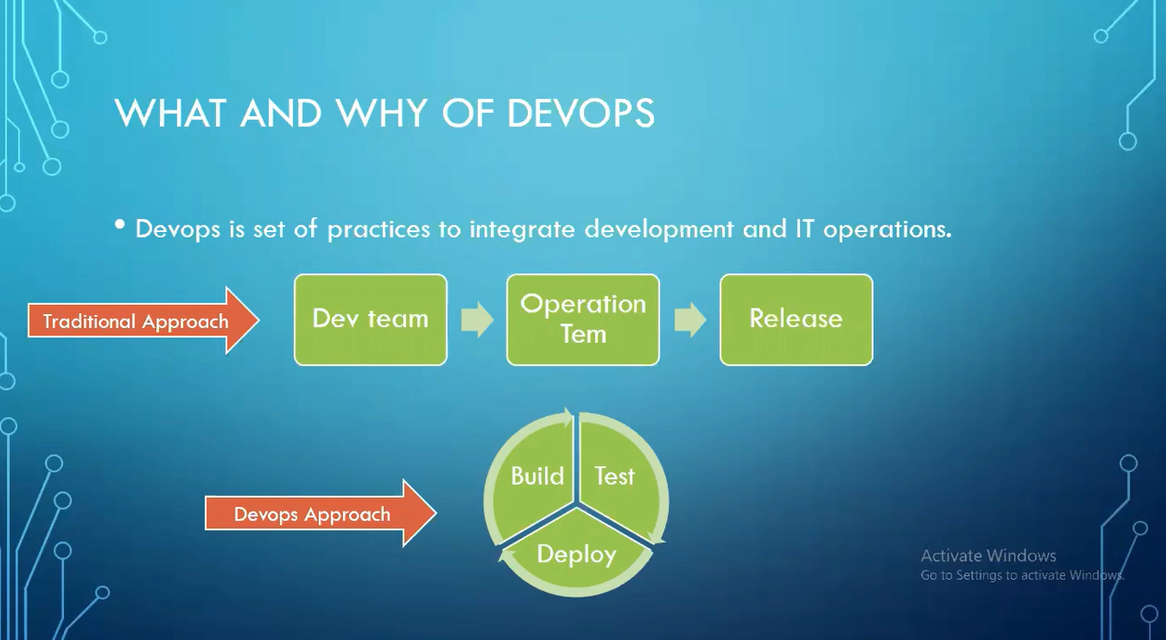

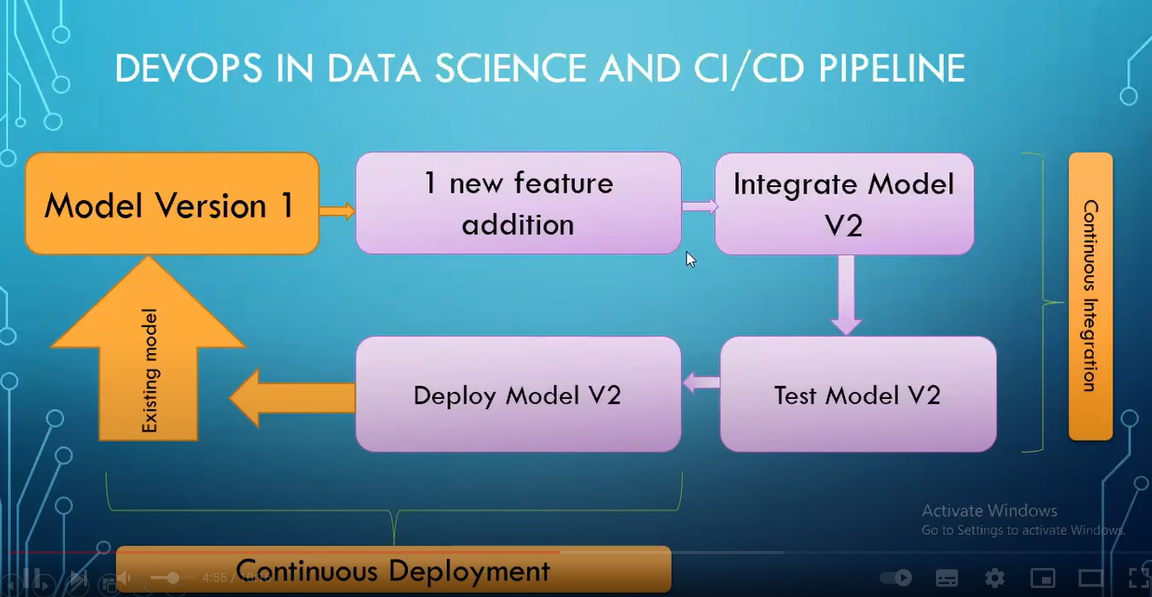

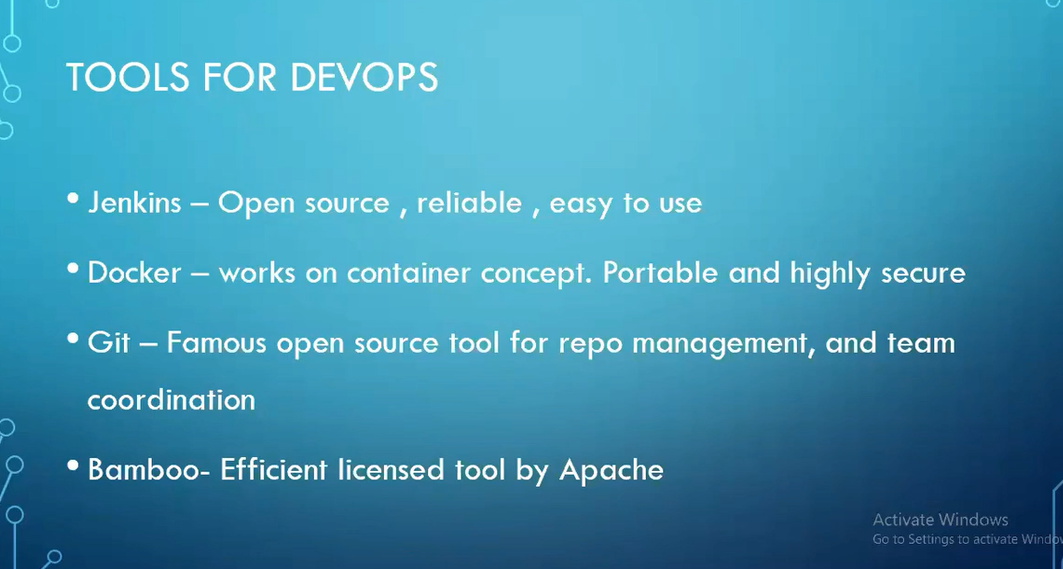

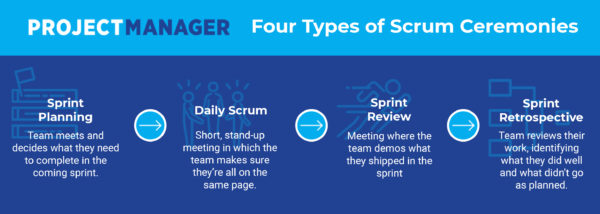

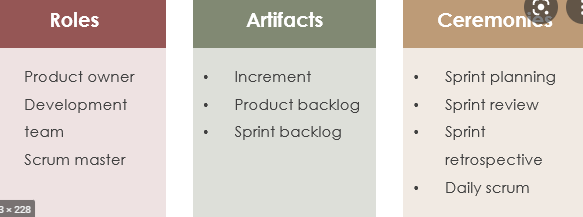

In [1]:
#Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Imporing packages and Data

In [3]:
#Importing Diabetes Data
DiabetesData = pd.read_csv("C:\\Users\\91976\\Downloads\\DATA SCI BATCH\\My\\Pipelines\\pima-indians-diabetes.csv", header=None)

In [4]:
DiabetesData

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#Assigning column names
DiabetesData.columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI",
                        "DiabetesPedigreeFunction","Age","Class"]

In [6]:
#viewing Data
DiabetesData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#Dividing Data in test and train
X_train,X_test,y_train,y_test=train_test_split(DiabetesData.iloc[:,[0,1,2,3,4,5,6,7]],DiabetesData.iloc[:,[8]],test_size=0.2,random_state=1)

In [8]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...,...
563,6,99,60,19,54,26.9,0.497,32
318,3,115,66,39,140,38.1,0.150,28
154,8,188,78,0,0,47.9,0.137,43
684,5,136,82,0,0,0.0,0.640,69


In [9]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


# Creating pipelines 

In [10]:
## Creating pipelines for Logistic regression, Decision Tree and Random Forest models
#  Pipeline steps will include
## 1. Data Preprocessing using MinMax Scaler
## 2. Reducing Dimensionality using PCA
## 3. Training respective models

In [18]:
#Logistic Regression Pipeline
LogisticRegressionPipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('logistic_classifier',LogisticRegression())])
LogisticRegressionPipeline

Pipeline(steps=[('myscaler', MinMaxScaler()), ('mypca', PCA(n_components=3)),
                ('logistic_classifier', LogisticRegression())])

In [12]:
#Decision tree Pipeline
DecisionTreePipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('decisiontree_classifier',DecisionTreeClassifier())])

In [13]:
#Random Forest Pipeline
RandomForestPipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('randomforest_classifier',RandomForestClassifier())])

# model training and validation

In [14]:
## Defining the pipelines in a list
mypipeline = [LogisticRegressionPipeline, DecisionTreePipeline, RandomForestPipeline]

In [15]:
#Defining variables for choosing best model
accuracy=0.0
classifier=0
pipeline=""

In [16]:
# Creating dictionary of pipelines and training models
PipelineDict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest'}

# Fit the pipelines
for mypipe in mypipeline:
    mypipe.fit(X_train, y_train)
    print(mypipe)

Pipeline(steps=[('myscaler', MinMaxScaler()), ('mypca', PCA(n_components=3)),
                ('logistic_classifier', LogisticRegression())])
Pipeline(steps=[('myscaler', MinMaxScaler()), ('mypca', PCA(n_components=3)),
                ('decisiontree_classifier', DecisionTreeClassifier())])
Pipeline(steps=[('myscaler', MinMaxScaler()), ('mypca', PCA(n_components=3)),
                ('randomforest_classifier', RandomForestClassifier())])


In [ ]:
mypipeline

In [17]:
#getting test accuracy for all classifiers
for i,model in enumerate(mypipeline):
    print("{} Test Accuracy: {}".format(PipelineDict[i],model.score(X_test,y_test)))
    print(model)

Logistic Regression Test Accuracy: 0.7597402597402597
Pipeline(steps=[('myscaler', MinMaxScaler()), ('mypca', PCA(n_components=3)),
                ('logistic_classifier', LogisticRegression())])
Decision Tree Test Accuracy: 0.7012987012987013
Pipeline(steps=[('myscaler', MinMaxScaler()), ('mypca', PCA(n_components=3)),
                ('decisiontree_classifier', DecisionTreeClassifier())])
Random Forest Test Accuracy: 0.7792207792207793
Pipeline(steps=[('myscaler', MinMaxScaler()), ('mypca', PCA(n_components=3)),
                ('randomforest_classifier', RandomForestClassifier())])


In [21]:
#Choosing best model for the given data
for i,model in enumerate(mypipeline):
    if model.score(X_test,y_test)>accuracy:
        accuracy=model.score(X_test,y_test)
        pipeline=model
        classifier=i
    print(i,pipeline,accuracy)
print('Classifier with best accuracy:{}'.format(PipelineDict[classifier]))

0 Pipeline(steps=[('myscaler', MinMaxScaler()), ('mypca', PCA(n_components=3)),
                ('randomforest_classifier', RandomForestClassifier())]) 0.7792207792207793
1 Pipeline(steps=[('myscaler', MinMaxScaler()), ('mypca', PCA(n_components=3)),
                ('randomforest_classifier', RandomForestClassifier())]) 0.7792207792207793
2 Pipeline(steps=[('myscaler', MinMaxScaler()), ('mypca', PCA(n_components=3)),
                ('randomforest_classifier', RandomForestClassifier())]) 0.7792207792207793
Classifier with best accuracy:Random Forest
